### assess interrater agreement for the two datasets

In [1]:
from twaidata.torchdatasets.DirectoryParser3DMRIDataset import *

In [2]:
mss3_ds = MSS3InterRaterDataset()

In [3]:
len(mss3_ds)

68

In [4]:
xs, ys, ind = mss3_ds[10]

In [5]:
ind

'MSS3_ED_003_V1'

In [6]:
xs.keys(), ys.keys()

(dict_keys(['mask', 'FLAIR', 'T1']), dict_keys(['lacune', 'wmhes', 'wmhmvh']))

In [7]:
xs['mask'].shape

torch.Size([53, 240, 240])

In [8]:
import matplotlib.pyplot as plt

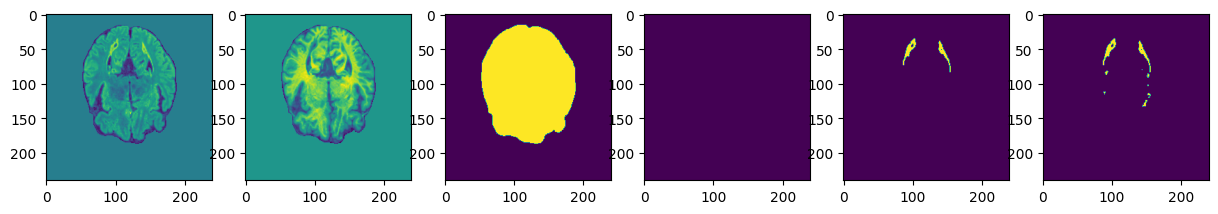

In [9]:
plt.figure(figsize=(15, 8))
plt.subplot(1,6,1)
plt.imshow(xs['FLAIR'][23])
plt.subplot(1,6,2)
plt.imshow(xs['T1'][23])
plt.subplot(1,6,3)
plt.imshow(xs['mask'][23])
plt.subplot(1,6,4)
plt.imshow(ys['lacune'][23])
plt.subplot(1,6,5)
plt.imshow(ys['wmhes'][23])
plt.subplot(1,6,6)
plt.imshow(ys['wmhmvh'][23])

In [27]:
from trustworthai.journal_run.evaluation.new_scripts.eval_helper_functions import fast_dice, fast_avd
import torch
from tqdm import tqdm

In [10]:
lbc_ds = LBCInterRaterDataset()

In [12]:
len(lbc_ds)

73

In [13]:
xs, ys, ind = lbc_ds[10]

In [14]:
ind

'LBC1921_21138'

In [15]:
xs.keys(), ys.keys()

(dict_keys(['mask', 'FLAIR', 'T1']),
 dict_keys(['wmh1', 'wmh2', 'wmh4', 'wmh5']))

In [16]:
xs['mask'].shape

torch.Size([48, 240, 240])

In [17]:
import matplotlib.pyplot as plt

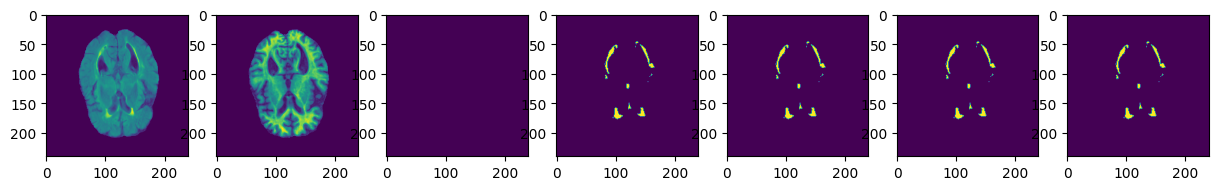

In [20]:
plt.figure(figsize=(15, 8))
plt.subplot(1,7,1)
plt.imshow(xs['FLAIR'][23])
plt.subplot(1,7,2)
plt.imshow(xs['T1'][23])
plt.subplot(1,7,3)
plt.imshow(xs['mask'][23])
plt.subplot(1,7,4)
plt.imshow(ys['wmh1'][23])
plt.subplot(1,7,5)
plt.imshow(ys['wmh2'][23])
plt.subplot(1,7,6)
plt.imshow(ys['wmh4'][23])
plt.subplot(1,7,7)
plt.imshow(ys['wmh5'][23])

In [93]:
def agreement_stats(ds):
    avg_dices = []
    std_dices = []
    inds = []
    avg_avds = []
    std_avds = []
    for xs, ys, ind in tqdm(ds):
        wmhs = []
        pair_dices = []
        pair_avds = []
        for key in ys.keys():
            if "wmh" in key.lower():
                wmhs.append(ys[key])
                for i in range(len(wmhs)):
                    for j in range(len(wmhs)):
                        if i != j and i < j:
                            wmh_i = wmhs[i]
                            wmh_j = wmhs[j]
                            pair_dices.append(
                                fast_dice(
                                    wmh_i.cuda(),
                                    wmh_j.cuda(),
                                )
                            )
                            pair_avds.append(
                                fast_avd(
                                    wmh_i.cuda(),
                                    wmh_j.cuda(),
                                )
                            )
        pair_dices = torch.Tensor(pair_dices)
        pair_avds = torch.Tensor(pair_avds)
        avg_dices.append(pair_dices.mean().item())
        std_dices.append(pair_dices.std().item())
        avg_avds.append(pair_avds.mean().item())
        std_avds.append(pair_avds.std().item())
        inds.append(ind)
        
    return avg_dices, std_dices, inds, avg_avds, std_avds

In [94]:
mss3_stats = agreement_stats(mss3_ds)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 68/68 [00:13<00:00,  4.89it/s]


In [101]:
def nice_box_plot(data, title, xlabel, xlim, bins=10):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Histogram with density instead of count
    n, bins, patches = ax.hist(data, bins=bins, density=False, edgecolor='black', linewidth=1.2, color='#607c8e')


    # Customizing the grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

    # Thickening the bottom and left spines
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)

    # Removing the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Customize ticks
    plt.minorticks_on()
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor')

    # labelling
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xlim(xlim)
    # plt.show()

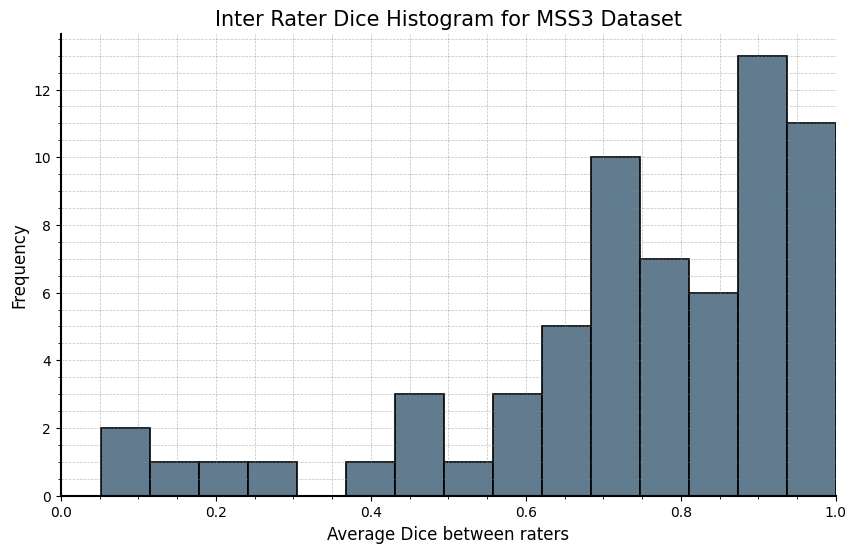

In [103]:
nice_box_plot(mss3_stats[0], "Inter Rater Dice Histogram for MSS3 Dataset", "Average Dice between raters", (0,1), bins=15)
plt.savefig("MSS3_interrater_dice.pdf", bbox_inches="tight")

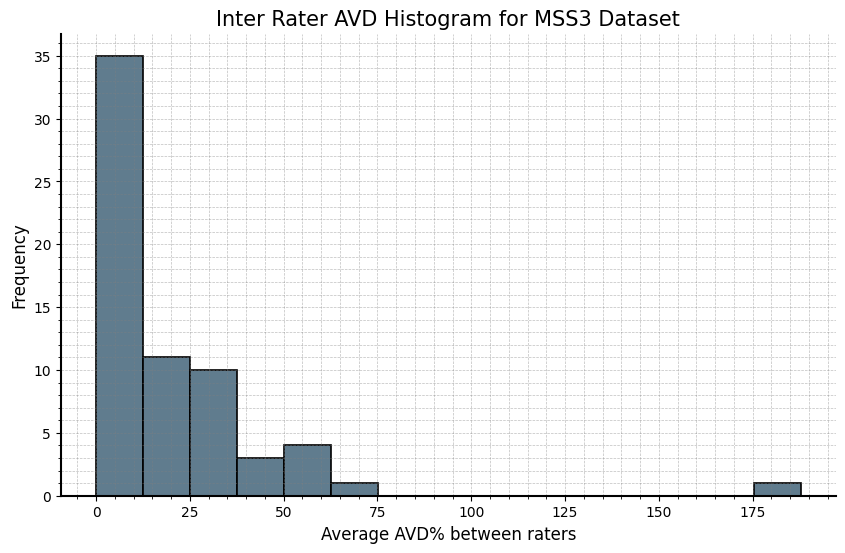

In [104]:
nice_box_plot(mss3_stats[3], "Inter Rater AVD Histogram for MSS3 Dataset", "Average AVD% between raters", None, bins=15)
plt.savefig("MSS3_interrater_AVD.pdf", bbox_inches="tight")

In [47]:
lbc_stats = agreement_stats(lbc_ds)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:21<00:00,  3.32it/s]


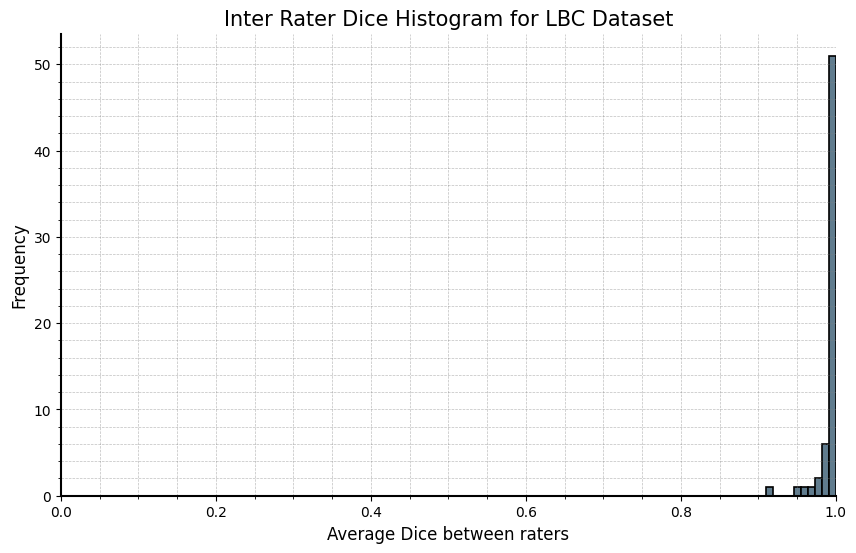

In [105]:
nice_box_plot(lbc_stats[0], "Inter Rater Dice Histogram for LBC Dataset", "Average Dice between raters", (0,1))
plt.savefig("LBC_interrater_dice.pdf", bbox_inches="tight")